<h2>1. Perkenalan</h2>
<hr>

<h2>Final Projek 4</h2>
<hr>

Authors dan Creators:

1. Sultan Chisson Obie

<h2>Instruksi</h2>
<hr>

Isi notebook harus mengikuti <b>outline</b> seperti di bawah:

1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan

<h2>Projek Rubrik</h2>
<hr>

1. Mengimplementasikan model klasifikasi machine learning dengan Sklearn (Logistic Regression)
2. Mengimplementasikan dan menganalisa confusion matrix
3. Menganalisa data setidaknya dengan 2 tipe grafik (Visualisasi)
4. Preprocessing data sebelum melakukan pengolahan lebih lanjut
5. Tanpa error
6. Tertata dengan baik (markdown) setiap kode
7. Analisis algoritma yang digunakan

<h2>Dataset (Credit Card Dataset for Clustering)</h2>
<hr>

Dataset yang dipakai bernama <b>Credit Card Dataset for Clustering</b> yang diperoleh dari https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Dataset ini berisi tentang perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku. Dataset ini terdiri dari 8950 baris dan 18 kolom.

<h4>Deskripsi Atribut</h4>

1. CUST_ID : Identifikasi pemegang Kartu Kredit (Kategorical)
2. BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PEMBELIAN : Jumlah pembelian yang dilakukan dari akun
5. ONEOFF_PURCHASES : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
6. INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan dengan cicilan
7. CASH_ADVANCE : Uang muka yang diberikan oleh pengguna
8. PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dengan cicilan dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY : Seberapa sering cash in advance dibayar
12. CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
13. PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
14. CREDIT_LIMIT : Batas Kartu Kredit untuk pengguna
15. PEMBAYARAN : Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCFULLPAYMENT: Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE : Masa berlaku layanan kartu kredit untuk pengguna

<h3>Objektif yang ingin dicapai</h3>
<hr>

1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

<h2>2. Import libraries</h2>
<hr>

In [ ]:
# data Manipulasi dan Analisis
import pandas as pd
import numpy as np

# visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# machine Learning dan Pemodelan
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split

# lainnya
import warnings
warnings.filterwarnings("ignore")

<h2>3. Data Loading</h2>
<hr>

In [ ]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' - ']

# read dataset
df = pd.read_csv('./dataset/CC General.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# menampilkan dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# melihat dimensi dataset
df.shape

(8950, 18)

In [ ]:
# melihat attribut yang ada pada dataset
df.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [ ]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<h2>4. Data Cleaning</h2>
<hr>

In [ ]:
# ubah semua nama attribute menjadi lowercase
df.columns = df.columns.str.lower()
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# mendrop kolom 'cust_id'
df = df.drop('cust_id', axis=1)

In [ ]:
# menampilkan apakah di setiap attribute ada missing value dengan tampilan boolean (true/false)
df.isna().any()

balance                             False
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                        False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                         True
payments                            False
minimum_payments                     True
prc_full_payment                    False
tenure                              False
dtype: bool

In [ ]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
# melihat apakah ada data duplikat pada dataset
df.duplicated().sum()

0

In [ ]:
# mengisi missing value dengan nilai mean
df = df.fillna(df.mean())

In [ ]:
# menampilkan jumlah missing value pada dataset
df.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

<h2>5. Explorasi Data</h2>
<hr>

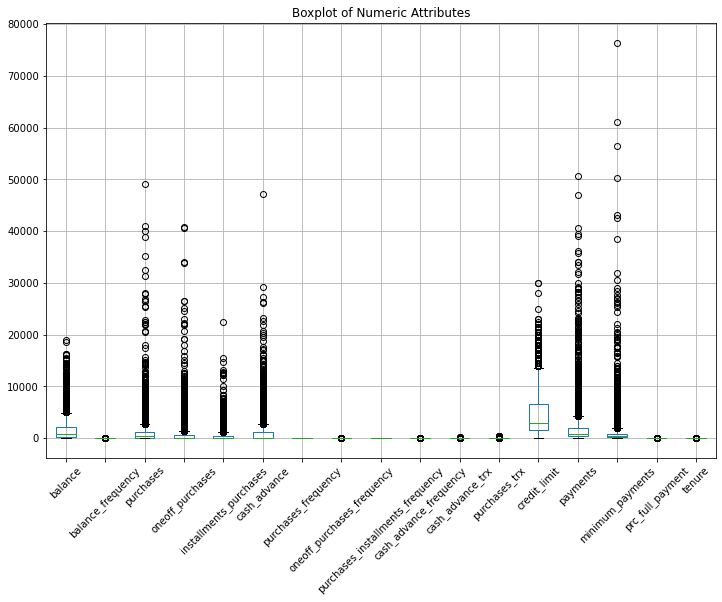

In [ ]:
# menampilkan boxplot untuk melihat outlier

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

In [ ]:
# menghitung z-score untuk setiap fitur dalam dataset
z = np.abs(stats.zscore(df))
z

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.731989,0.249434,0.424900,0.356934,0.349079,0.466786,0.806490,0.678661,0.707313,0.675349,0.476070,0.511333,0.960433,0.528979,3.109675e-01,0.525551,0.360680
1,0.786961,0.134325,0.469552,0.356934,0.454576,2.605605,1.221758,0.678661,0.916995,0.573963,0.110074,0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,0.107668,0.108889,0.454576,0.466786,1.269843,2.673451,0.916995,0.675349,0.476070,0.109020,0.826062,0.383805,1.016632e-01,0.525551,0.360680
3,0.049099,1.016953,0.232058,0.546189,0.454576,0.368653,1.014125,0.399319,0.916995,0.258913,0.329534,0.551565,0.826062,0.598688,4.390474e-16,0.525551,0.360680
4,0.358775,0.518084,0.462063,0.347294,0.454576,0.466786,1.014125,0.399319,0.916995,0.675349,0.476070,0.551565,0.905464,0.364368,2.657913e-01,0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.737950,0.518084,0.333293,0.356934,0.132643,0.466786,1.269843,0.678661,1.179833,0.675349,0.476070,0.350408,0.960433,0.486217,3.498541e-01,1.183951,4.122768
8946,0.742423,0.518084,0.329136,0.356934,0.122823,0.466786,1.269843,0.678661,1.179833,0.675349,0.476070,0.350408,0.960433,0.503396,4.390474e-16,0.525551,4.122768
8947,0.740398,0.185477,0.401965,0.356934,0.294893,0.466786,0.854576,0.678661,0.760469,0.675349,0.476070,0.390639,0.960433,0.570615,3.354655e-01,0.329200,4.122768
8948,0.745174,0.185477,0.469552,0.356934,0.454576,0.449352,1.221758,0.678661,0.916995,0.157527,0.182998,0.591796,1.097856,0.580536,3.469065e-01,0.329200,4.122768


In [ ]:
# menetapikan nilai ambang sebesar 3
threshold = 3

# mencari posisi dari elemen-elemen dalam array 'z' yang memenuhi kondisi z>3
print(np.where(z > 3))

(array([   6,   19,   20, ..., 8947, 8948, 8949], dtype=int64), array([ 3, 14, 14, ..., 16, 16, 16], dtype=int64))


In [ ]:
# menampilkan bentuk shape lama sebelum handling missing value
print("Bentuk Shape Lama: ", df.shape)

# handling missing value
df = df[(z < 3).all(axis=1)]

# menampilkan bentuk shape baru setelah handling missing value
print("Bentuk Shape Baru: ", df.shape)

Bentuk Shape Lama:  (8950, 17)
Bentuk Shape Baru:  (7434, 17)


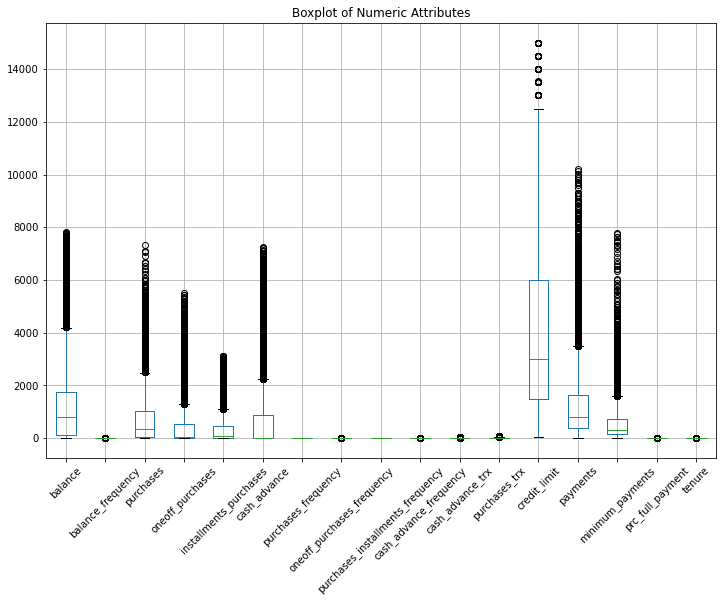

In [ ]:
# menampilkan boxplot untuk melihat outlier

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Attributes')
plt.show()

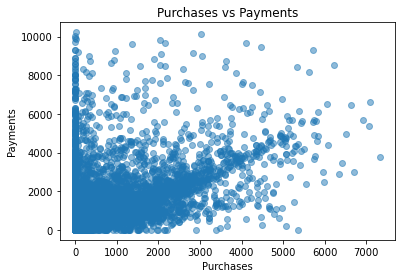

In [ ]:
# Mengambil kolom 'PURCHASES' dan 'PAYMENTS'
purchases = df['purchases']
payments = df['payments']

# Membuat scatter plot
plt.scatter(purchases, payments, alpha=0.5)

# Memberikan label pada sumbu x dan y
plt.xlabel('Purchases')
plt.ylabel('Payments')

# Menambahkan judul
plt.title('Purchases vs Payments')

# Menampilkan scatter plot
plt.show()

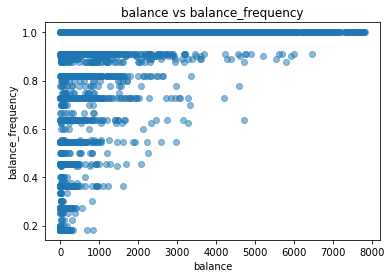

In [ ]:
# Mengambil kolom 'PURCHASES' dan 'PAYMENTS'
purchases = df['balance']
payments = df['balance_frequency']

# Membuat scatter plot
plt.scatter(purchases, payments, alpha=0.5)

# Memberikan label pada sumbu x dan y
plt.xlabel('balance')
plt.ylabel('balance_frequency')

# Menambahkan judul
plt.title('balance vs balance_frequency')

# Menampilkan scatter plot
plt.show()

<h2>6. Data Preprocessing</h2>
<hr>

In [ ]:
# menampilkan statistik deskriptif dari kolom-kolom numerik pada dataset
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,1269.831784,0.889646,753.123265,431.275673,322.112279,671.957249,0.485746,0.192344,0.357495,0.109677,2.314501,12.057842,3999.597543,1297.565656,588.090784,0.154570,11.750740
std,1517.952340,0.213397,1025.441760,793.561465,506.012658,1235.334487,0.396350,0.287619,0.392628,0.158778,3.941055,15.120242,2935.900739,1436.498465,776.407375,0.290825,0.798485
min,0.001214,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,8.000000
25%,120.946159,0.909091,46.687500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.216308,167.947384,0.000000,12.000000
50%,790.090769,1.000000,360.955000,35.000000,88.915000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,797.938345,291.135341,0.000000,12.000000
75%,1750.662783,1.000000,1023.372500,520.000000,443.250000,889.266455,0.916667,0.250000,0.750000,0.166667,3.000000,16.000000,6000.000000,1626.296448,736.779962,0.166667,12.000000
max,7803.071972,1.000000,7323.380000,5497.040000,3119.280000,7232.069823,1.000000,1.000000,1.000000,0.727273,23.000000,89.000000,15000.000000,10226.601760,7781.671432,1.000000,12.000000


In [ ]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan penskalaan fitur dan menyimpan hasilnya pada variabel baru
df_scaled = scaler.fit_transform(df)

<h2>7. Pendefinisian Model</h2>
<hr>

<h2>K-Means</h2><br>
K-Means adalah salah satu algoritma clustering yang populer dalam machine learning. Tujuannya adalah untuk mengelompokkan data ke dalam beberapa kelompok berdasarkan kesamaan fitur. Model K-Means mencoba meminimalkan jumlah variansi dalam setiap kelompok dengan menempatkan pusat kelompok yang optimal.
Proses K-Means terdiri dari langkah-langkah berikut:

* Menentukan jumlah kelompok (k) yang diinginkan.
* Menginisialisasi pusat kelompok secara acak.
* Menetapkan setiap titik data ke kelompok yang memiliki pusat terdekat.
* Menghitung ulang pusat kelompok berdasarkan rata-rata titik data dalam kelompok.
* Mengulangi langkah ketiga dan keempat hingga konvergensi atau kondisi berhenti tercapai.

<h2>K-Medoids</h2><br>
K-Medoids, juga dikenal sebagai Partitioning Around Medoids (PAM), adalah variasi dari algoritma K-Means yang menggunakan medoid sebagai pusat kelompok. Medoid adalah titik data dalam kelompok yang memiliki jarak total minimum ke semua titik data lainnya dalam kelompok.
Langkah-langkah K-Medoids mirip dengan K-Means, tetapi perbedaannya adalah:

* Pusat kelompok dipilih sebagai medoid yang merupakan titik data aktual, bukan pusat kelompok yang dihitung berdasarkan rata-rata.
* Pemilihan medoid dilakukan dengan menghitung total jarak antara titik data dan semua titik lain dalam kelompok, dan memilih titik data dengan total jarak minimum sebagai medoid.

<h2>DBSCAN</h2><br>
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma clustering yang menggunakan kepadatan data untuk mengelompokkan titik-titik yang memiliki kepadatan yang tinggi dalam satu kelompok, sementara titik-titik yang jarang dianggap sebagai noise atau outlier.
Proses DBSCAN melibatkan langkah-langkah berikut:

* Menentukan parameter epsilon sebagai jarak maksimum di antara dua titik untuk dianggap tetangga.
* Menentukan parameter minimum points (MinPts) sebagai jumlah minimum tetangga dalam suatu wilayah untuk mendefinisikan core point.
* Memilih titik acak yang belum dikunjungi.
* Mencari semua tetangga titik tersebut dalam jarak ε.
* Jika jumlah tetangga memenuhi syarat sebagai core point, membentuk cluster baru dan mencari tetangga-tetangga core point tersebut secara rekursif.
* Mengulangi langkah 3-5 hingga semua titik telah dikunjungi dan dielompokkan ke dalam cluster atau dianggap sebagai noise.

In [ ]:
# Model K-means
kmeans = KMeans(n_clusters=3)

# Model K-medoids
kmedoids = KMedoids(n_clusters=3)

# Model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

<h2>8. Pelatihan Model</h2>
<hr>

In [ ]:
# melatih model K-means
kmeans.fit(df_scaled)

# melatih model Kmedoids
kmedoids.fit(df_scaled)

# melatih model DBSCAN
dbscan.fit(df_scaled)

DBSCAN()

<h2>9. Evaluasi Model</h2>
<hr>

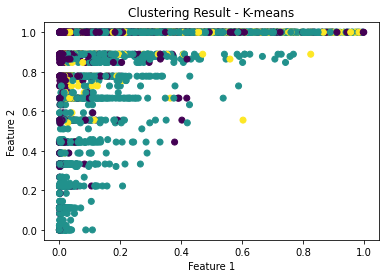

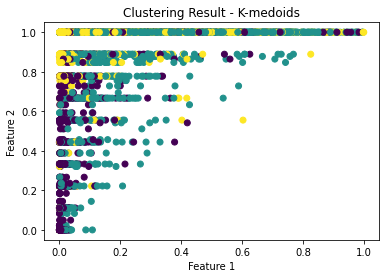

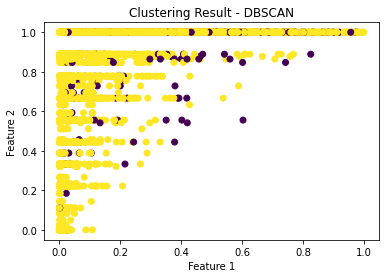

In [ ]:
# Visualisasi K-means
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Result - K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualisasi K-medoids
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.title('Clustering Result - K-medoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualisasi DBSCAN
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('Clustering Result - DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluasi K-means
kmeans_silhouette = silhouette_score(df_scaled, kmeans.labels_)
print("Silhouette Score K-means:", kmeans_silhouette)

# Evaluasi K-medoids
kmedoids_silhouette = silhouette_score(df_scaled, kmedoids.labels_)
print("Silhouette Score K-medoids:", kmedoids_silhouette)

# Evaluasi DBSCAN
dbscan_silhouette = silhouette_score(df_scaled, dbscan.labels_)
print("Silhouette Score DBSCAN:", dbscan_silhouette)

Silhouette Score K-means: 0.2973105531484135
Silhouette Score K-medoids: 0.21500608834702034
Silhouette Score DBSCAN: 0.2292284028730795


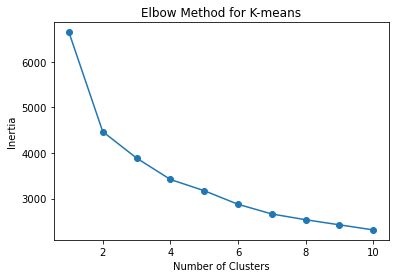

In [ ]:
# Evaluasi K-means menggunakan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.show()

<h2>10. Model Inference</h2>
<hr>

In [ ]:
# Melakukan inferensi dengan model clustering yang telah dilatih
kmeans_labels = kmeans.predict(df_scaled)
kmedoids_labels = kmedoids.predict(df_scaled)
dbscan_labels = dbscan.labels_

# Menambahkan kolom hasil inferensi ke dalam dataset
df['KMeans_Labels'] = kmeans_labels
df['KMedoids_Labels'] = kmedoids_labels
df['DBSCAN_Labels'] = dbscan_labels

# Menampilkan hasil segmentasi
print("Hasil Segmentasi menggunakan K-means:")
print(df['KMeans_Labels'].value_counts())

print("\nHasil Segmentasi menggunakan K-medoids:")
print(df['KMedoids_Labels'].value_counts())

print("\nHasil Segmentasi menggunakan DBSCAN:")
print(df['DBSCAN_Labels'].value_counts())

Hasil Segmentasi menggunakan K-means:
0    1600
3    1143
1     979
5     812
6     673
4     536
7     528
8     506
9     342
2     315
Name: KMeans_Labels, dtype: int64

Hasil Segmentasi menggunakan K-medoids:
1    2801
2    2411
0    2222
Name: KMedoids_Labels, dtype: int64

Hasil Segmentasi menggunakan DBSCAN:
 0    7146
-1     288
Name: DBSCAN_Labels, dtype: int64


<h2>11. Kesimpulan</h2>
<hr>

Dataset yang digunakan bernama Credit Card Dataset for Clustering yang berisi tentang perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku. Dataset ini terdiri dari 8950 baris dan 18 kolom.

Hasil evaluasi model menggunakan tiga metode clustering menunjukkan skor sebagai berikut:
* Silhouette Score K-means: 0.2973105531484135
* Silhouette Score K-medoids: 0.21500608834702034
* Silhouette Score DBSCAN: 0.2292284028730795

Berdasarkan hasil segmentasi dengan menggunakan tiga metode clustering yang berbeda (K-means, K-medoids dan DBSCAN), dapat ditarik beberapa kesimpulan:
1. K-means memberikan 10 cluster dengan jumlah observasi terbanyak adalah cluster 0 (1600 observasi), diikuti oleh cluster 3 (1143 observasi). Cluster lain memiliki jumlah observasi yang lebih sedikit.
2. K-medoids membuat 3 cluster dengan jumlah observasi terbanyak, cluster 1 (2801 observasi), diikuti cluster 2 (2411 observasi) dan cluster 0 (2222 observasi).
3. DBSCAN menghasilkan 2 cluster dengan jumlah observasi terbanyak, cluster 0 (7146 observasi), sedangkan 288 observasi dianggap noise (-1).

Kesimpulan yang dapat ditarik dari hasil di atas adalah:
1. Setiap metode clustering menghasilkan jumlah cluster yang berbeda. K-means membuat 10 cluster, K-medoids membuat 3 cluster, dan DBSCAN membuat 2 cluster
2. Distribusi observasi pada setiap cluster juga berbeda antar metode clustering. Misalnya, cluster terbesar di K-means (cluster 0) tidak sama dengan cluster terbesar di K-medoids (cluster 1) atau DBSCAN (cluster 0).
3. Hasil clustering dapat dipengaruhi oleh algoritma dan parameter yang digunakan pada masing-masing metode. Oleh karena itu, hasil segmentasi dapat bervariasi antara metode pengelompokan yang berbeda.